In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib widget

In [3]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### Reference: Influence of hole shape on sound absorption of underwater anechoic layers
#### https://www.sciencedirect.com/science/article/abs/pii/S0022460X1830227X

### Import pre-defined class and function

In [4]:
%run -i hole_shape_sound_absorption.py

### Define the determinant of the coefficient matrix of eq(14) in the paper

In [5]:
determinant, mat = determinant_from_matrix()
mat

Matrix([
[                                                                                                              -sqrt(-kz**2 + omega**2/cl**2)*besselj(1, b*sqrt(-kz**2 + omega**2/cl**2)),                                                                                                               -sqrt(-kz**2 + omega**2/cl**2)*bessely(1, b*sqrt(-kz**2 + omega**2/cl**2)),                                                                                      -I*kz*sqrt(-kz**2 + omega**2/ct**2)*besselj(1, b*sqrt(-kz**2 + omega**2/ct**2)),                                                                                      -I*kz*sqrt(-kz**2 + omega**2/ct**2)*bessely(1, b*sqrt(-kz**2 + omega**2/ct**2))],
[(-2*mu*(-kz**2 + omega**2/cl**2) - lambda*omega**2/cl**2)*besselj(0, a*sqrt(-kz**2 + omega**2/cl**2)) + 2*mu*sqrt(-kz**2 + omega**2/cl**2)*besselj(1, a*sqrt(-kz**2 + omega**2/cl**2))/a, (-2*mu*(-kz**2 + omega**2/cl**2) - lambda*omega**2/cl**2)*bessely(0, a*sqrt(-kz**2 + omega**2/cl**

### Define the frequency array by np.arange

In [6]:
np.arange?

Docstring:
arange([start,] stop[, step,], dtype=None, *, like=None)

Return evenly spaced values within a given interval.

Values are generated within the half-open interval ``[start, stop)``
(in other words, the interval including `start` but excluding `stop`).
For integer arguments the function is equivalent to the Python built-in
`range` function, but returns an ndarray rather than a list.

When using a non-integer step, such as 0.1, the results will often not
be consistent.  It is better to use `numpy.linspace` for these cases.

Parameters
----------
start : integer or real, optional
    Start of interval.  The interval includes this value.  The default
    start value is 0.
stop : integer or real
    End of interval.  The interval does not include this value, except
    in some cases where `step` is not an integer and floating point
    round-off affects the length of `out`.
step : integer or real, optional
    Spacing between values.  For any output `out`, this is the distance
  

In [7]:
frequency_array = np.arange(20, 10021, 200)
frequency_array

array([   20,   220,   420,   620,   820,  1020,  1220,  1420,  1620,
        1820,  2020,  2220,  2420,  2620,  2820,  3020,  3220,  3420,
        3620,  3820,  4020,  4220,  4420,  4620,  4820,  5020,  5220,
        5420,  5620,  5820,  6020,  6220,  6420,  6620,  6820,  7020,
        7220,  7420,  7620,  7820,  8020,  8220,  8420,  8620,  8820,
        9020,  9220,  9420,  9620,  9820, 10020])

## Define an object of sound_performance for calculating sound absorption
### The default values are listed as below (all in SI units)

Material of anechoic layer: rubber

Young's modulus of rubber (GPa): 0.14

Loss factor of rubber 0.23

Poisson ratio of rubber 0.49

Density of rubber (kg/m3): 1100

Density of air (kg/m3): 1.21

Shape: cone

p = 4 mm

q = 8 mm

lh = 40 mm

cell_radius = 15 mm

num_segments = 100

Density of water (kg/m3): 998

Sound speed of water (m/s): 1483

#### https://en.wikipedia.org/wiki/Lam%C3%A9_parameters

### Example 01: default case

In [8]:
cone_4_8 = sound_performance(determinant, frequency_array)

In [9]:
cone_4_8.material

'rubber'

In [10]:
cone_4_8.shape

'cone'

In [11]:
cone_4_8.p_hole

0.004

In [12]:
cone_4_8.h_hole

0.04

In [13]:
cone_4_8.segments

100

In [14]:
cone_4_8.Young

140000000.0

In [15]:
## Find roots of wavenumber in the equation of determinant
cone_4_8.wavenumer_array, cone_4_8.failed_root = cone_4_8.axial_wavenumber_array()

Solving determinant at frequency = 20 is done.
Solving determinant at frequency = 220 is done.
Solving determinant at frequency = 420 is done.
Solving determinant at frequency = 620 is done.
Solving determinant at frequency = 820 is done.
Solving determinant at frequency = 1020 is done.
Solving determinant at frequency = 1220 is done.
Solving determinant at frequency = 1420 is done.
Solving determinant at frequency = 1620 is done.
Solving determinant at frequency = 1820 is done.
Solving determinant at frequency = 2020 is done.
Solving determinant at frequency = 2220 is done.
Solving determinant at frequency = 2420 is done.
Solving determinant at frequency = 2620 is done.
Solving determinant at frequency = 2820 is done.
First try of finding root at frequency = 3020.00, i = 0 / 100 failed.
Try again...
Solving determinant at frequency = 3020 is done.
Solving determinant at frequency = 3220 is done.
Solving determinant at frequency = 3420 is done.
Solving determinant at frequency = 3620 i

In [16]:
## Calculate sound absorption of cone_4_8
cone_4_8.absorption_frequency()

self.frequency_array.shape[0] = 51 is same as self.wavenumer_array.shape[0] = 51


array([0.01640976, 0.1616465 , 0.26690127, 0.33390387, 0.3708973 ,
       0.3869547 , 0.38948497, 0.38378726, 0.37340279, 0.36061385,
       0.34686371, 0.3330575 , 0.31976359, 0.3073442 , 0.29603944,
       0.28602158, 0.27743085, 0.27040001, 0.26507212, 0.26161477,
       0.26023237, 0.26117801, 0.26476535, 0.27138096, 0.28149655,
       0.29567962, 0.31459965, 0.33902405, 0.36979451, 0.40776893,
       0.4537083 , 0.5080842 , 0.57078909, 0.64075935, 0.71558538,
       0.79127917, 0.86244737, 0.92306744, 0.96779632, 0.99335239,
       0.99932689, 0.98804911, 0.96367242, 0.93100863, 0.89459203,
       0.85817178, 0.82458373, 0.79585628, 0.77342692, 0.75840159,
       0.75176633])

In [17]:
## Save the data
fp = '/Users/chenghunglin/Documents/'
fn = 'cone_4_8.xlsx'
cone_4_8.save_data(fp, fn)

self.frequency_array.shape[0] = 51 is same as self.wavenumer_array.shape[0] = 51
Save file to /Users/chenghunglin/Documents/cone_4_8.xlsx


### Example 02: change shape, p, q

In [18]:
horn_1_11 = sound_performance(determinant, frequency_array)

In [19]:
horn_1_11.shape = 'horn'
horn_1_11.p_hole = 1e-3
horn_1_11.q_hole = 11e-3

In [20]:
## Find roots of wavenumber in the equation of determinant
horn_1_11.wavenumer_array, horn_1_11.failed_root = horn_1_11.axial_wavenumber_array()

Solving determinant at frequency = 20 is done.
Solving determinant at frequency = 220 is done.
Solving determinant at frequency = 420 is done.
Solving determinant at frequency = 620 is done.
Solving determinant at frequency = 820 is done.
Solving determinant at frequency = 1020 is done.
Solving determinant at frequency = 1220 is done.
Solving determinant at frequency = 1420 is done.
Solving determinant at frequency = 1620 is done.
Solving determinant at frequency = 1820 is done.
Solving determinant at frequency = 2020 is done.
Solving determinant at frequency = 2220 is done.
Solving determinant at frequency = 2420 is done.
Solving determinant at frequency = 2620 is done.
Solving determinant at frequency = 2820 is done.
Solving determinant at frequency = 3020 is done.
Solving determinant at frequency = 3220 is done.
Solving determinant at frequency = 3420 is done.
Solving determinant at frequency = 3620 is done.
Solving determinant at frequency = 3820 is done.
Solving determinant at fre

In [21]:
## Save the data
fp = '/Users/chenghunglin/Documents/'
fn = 'horn_1_11.xlsx'
horn_1_11.save_data(fp, fn)

self.frequency_array.shape[0] = 51 is same as self.wavenumer_array.shape[0] = 51
Save file to /Users/chenghunglin/Documents/horn_1_11.xlsx


## Plot data to compare with the paper

self.frequency_array.shape[0] = 51 is same as self.wavenumer_array.shape[0] = 51
self.frequency_array.shape[0] = 51 is same as self.wavenumer_array.shape[0] = 51


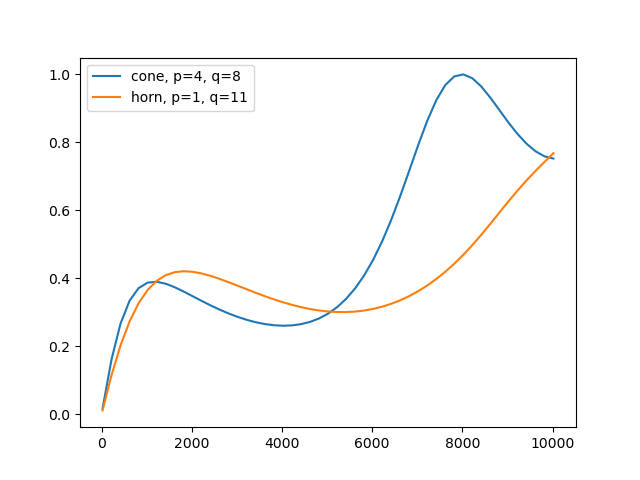

In [22]:
plt.figure()
plt.plot(cone_4_8.frequency_array, cone_4_8.absorption_frequency(), label='cone, p=4, q=8')
plt.plot(horn_1_11.frequency_array, horn_1_11.absorption_frequency(), label='horn, p=1, q=11')
plt.legend()